# Optimal BMI for runners

In this project we analyse data from Olympic runners and give you an estimate of the optimal BMI to enhance your running performance.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

olympic = pd.read_csv('athlete_events.csv')

In [2]:
hundred_m = olympic[olympic['Event'] == "Athletics Men's 100 metres"]
hundred_f = olympic[olympic['Event'] == "Athletics Women's 100 metres"]

two_h_m = olympic[olympic['Event'] == "Athletics Men's 200 metres"]
two_h_f = olympic[olympic['Event'] == "Athletics Women's 200 metres"]

four_h_m = olympic[olympic['Event'] == "Athletics Men's 400 metres"]
four_h_f = olympic[olympic['Event'] == "Athletics Women's 400 metres"]

eight_h_m = olympic[olympic['Event'] == "Athletics Men's 800 metres"]
eight_h_f = olympic[olympic['Event'] == "Athletics Women's 800 metres"]

oneandhalfk_m = olympic[olympic['Event'] == "Athletics Men's 1,500 metres"]
oneandhalfk_f = olympic[olympic['Event'] == "Athletics Men's 1,500 metres"]

fivek_m = olympic[olympic['Event'] == "Athletics Men's 5,000 metres"]
fivek_f = olympic[olympic['Event'] == "Athletics Women's 5,000 metres"]

tenk_m = olympic[olympic['Event'] == "Athletics Men's 10,000 metres"]
tenk_f = olympic[olympic['Event'] == "Athletics Women's 10,000 metres"]

marathon_m = olympic[olympic['Event'] == "Athletics Men's Marathon"]
marathon_f = olympic[olympic['Event'] == "Athletics Men's Marathon"]

In [3]:
runners_all = pd.concat([hundred_m, hundred_f, two_h_m, two_h_f, four_h_m, four_h_f, eight_h_m, eight_h_f, oneandhalfk_m, oneandhalfk_f, fivek_m, fivek_f, tenk_m, tenk_f, marathon_m, marathon_f])

useful_columns = ['ID', 'Sex', 'Age', 'Height', 'Weight', 'Year', 'Event', 'Medal']

runners = runners_all[useful_columns]

runners = runners[runners['Year'] > 1980]

In [4]:
numeric_dict = {'F' : 0, 'M' : 1, "Athletics Men's 100 metres" : 100, "Athletics Women's 100 metres" : 100, "Athletics Men's 200 metres" : 200, \
                "Athletics Women's 200 metres" : 200, "Athletics Men's 400 metres" : 400, "Athletics Women's 400 metres" : 400, "Athletics Men's 800 metres" : 800, \
                "Athletics Women's 800 metres" : 800, "Athletics Men's 1,500 metres" : 1500, "Athletics Women's 1,500 metres" : 1500,  "Athletics Women's 5,000 metres" : 5000, \
                "Athletics Men's 5,000 metres" : 5000, "Athletics Women's 10,000 metres" : 10000, "Athletics Men's 10,000 metres" : 10000, \
                "Athletics Women's Marathon" : 42195, "Athletics Men's Marathon" : 42195, 'Bronze' : 2, 'Silver' : 3, 'Gold' : 4, 'NaN' : 1}

In [5]:
r_numeric = runners.replace({"Sex": numeric_dict, 'Event': numeric_dict, 'Medal': numeric_dict})

r_numeric['Medal'] = r_numeric['Medal'].fillna(1)

In [6]:
r_numeric.dropna(inplace = True)

We looked at the data from actual Olympic athletes so you don't have to, and here's how it looked like:

<AxesSubplot:xlabel='Height', ylabel='Weight'>

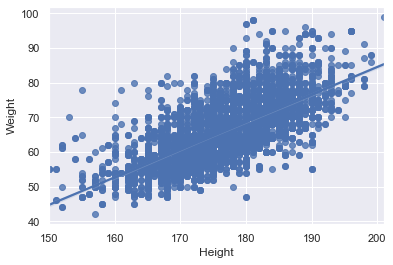

In [7]:
sns.set_theme(color_codes=True)
sns.regplot(x='Height', y='Weight', data=r_numeric[r_numeric['Sex'] == 1])

<AxesSubplot:xlabel='Height', ylabel='Weight'>

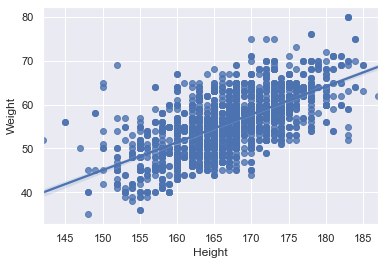

In [8]:
sns.regplot(x='Height', y='Weight', data=r_numeric[r_numeric['Sex'] == 0])

But worry not, we've got you. Let's unpack this and make it useful for you.